<h1><center>
Toxic Comments Kaggle Competition Classifying
</center></h1>
<h2><center>
Modeling the Data
</center></h2>
<h3><center>
Marcel Colvin 912033961
</center></h3>

In [104]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
import re
import glob
%matplotlib inline

In [105]:
import warnings
warnings.filterwarnings("ignore")

In [106]:
train = pd.read_csv("training_data.csv")
test = pd.read_csv("test_data.csv")

In [107]:
len(train)
len(test)

153164

# MLP Classifier with w2v algorithm
### This had 95.35% accuracy

In [108]:
train["avg_word"] = train["avg_word"].apply(lambda x: 
                           np.fromstring(
                               x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' '), sep=' '))

In [109]:
test["avg_word"] = test["avg_word"].apply(lambda x: 
                           np.fromstring(
                               x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' '), sep=' '))

In [110]:
train_matrix = np.zeros((len(train),300), dtype="float64")
test_matrix = np.zeros((len(test),300), dtype="float64")
for i in range(len(train)):
    train_matrix[i] = train.iloc[i]["avg_word"].reshape((1,300))
for i in range(len(test)):
        test_matrix[i] = test.iloc[i]["avg_word"].reshape((1,300))

In [111]:
y_train = [train["toxic"], train["severe_toxic"], train["obscene"], train["threat"], train["insult"], train["identity_hate"]]

In [112]:
x_train = train["avg_word"].values

In [113]:
model = []
for i in range(6):
    m = MLPClassifier(hidden_layer_sizes=(30,30,30), random_state=5)
    model.append(m)

In [114]:
for i in range(6):
    model[i].partial_fit(train_matrix, y_train[i], [0,1])

In [11]:
result = test[['id']].copy() 

In [12]:
result['toxic'] = model[0].predict_proba(test_matrix)[:,1]
result['severe_toxic'] = model[1].predict_proba(test_matrix)[:,1]
result['obscene'] = model[2].predict_proba(test_matrix)[:,1]
result['threat'] = model[3].predict_proba(test_matrix)[:,1]
result['insult'] = model[4].predict_proba(test_matrix)[:,1]
result['identity_hate'] = model[5].predict_proba(test_matrix)[:,1]

In [13]:
result.to_csv("submission.csv", index = False)

## Logistic Regression on Word2Vec
### 95.09%

In [14]:
model = []
for i in range(6):
    m = LogisticRegression(C=10.0)
    model.append(m)

In [15]:
for i in range(6):
    model[i].fit(train_matrix, y_train[i])

In [16]:
result = test[['id']].copy() 

In [17]:
result['toxic'] = model[0].predict_proba(test_matrix)[:,1]
result['severe_toxic'] = model[1].predict_proba(test_matrix)[:,1]
result['obscene'] = model[2].predict_proba(test_matrix)[:,1]
result['threat'] = model[3].predict_proba(test_matrix)[:,1]
result['insult'] = model[4].predict_proba(test_matrix)[:,1]
result['identity_hate'] = model[5].predict_proba(test_matrix)[:,1]

In [18]:
result.to_csv("submission.csv", index = False)

# TFIDF Logistitc Regression, "comment_text" uncleaned
### This had 93.94% accuracy

In [19]:
tfidfvect = TfidfVectorizer(max_features=5000,stop_words='english')

In [20]:
X = tfidfvect.fit_transform(train["comment_text"])

In [21]:
testX = tfidfvect.transform(test["comment_text"])

In [22]:
y_train = [train["toxic"], train["severe_toxic"], train["obscene"], train["threat"], train["insult"], train["identity_hate"]]

In [23]:
model = []
for i in range(6):
    m = LogisticRegression(C=10.0)
    model.append(m)

In [24]:
for i in range(6):
    model[i].fit(X,y_train[i])

In [25]:
result = test[['id']].copy() 

In [26]:
result['toxic'] = model[0].predict_proba(testX)[:,1]
result['severe_toxic'] = model[1].predict_proba(testX)[:,1]
result['obscene'] = model[2].predict_proba(testX)[:,1]
result['threat'] = model[3].predict_proba(testX)[:,1]
result['insult'] = model[4].predict_proba(testX)[:,1]
result['identity_hate'] = model[5].predict_proba(testX)[:,1]

In [27]:
result.to_csv("submission.csv", index = False)

# Cleaning "comment_text" to run TFIDF Logistic Regression Again
### This had 96.30% accuracy

In [28]:
def text_cleaner(word):
    word = word.lower()
    word = re.sub(r"\'s", ' ', word)
    word = re.sub("<[^>]*>", " ", word)
    word = re.sub('\W', ' ', word)
    word = re.sub('\s+', ' ', word)
    word = word.strip(' ')
    return word

In [29]:
train["comment_text"] = train['comment_text'].map(lambda word : text_cleaner(word))
test["comment_text"] = test['comment_text'].map(lambda word : text_cleaner(word))

In [30]:
tfidfvect = TfidfVectorizer(max_features=5000,stop_words='english')

In [31]:
X = tfidfvect.fit_transform(train["comment_text"])

In [32]:
y_train = [train["toxic"], train["severe_toxic"], train["obscene"], train["threat"], train["insult"], train["identity_hate"]]

In [33]:
testX = tfidfvect.transform(test["comment_text"])

In [34]:
model = []
for i in range(6):
    m = LogisticRegression(C=10.0)
    model.append(m)

In [35]:
for i in range(6):
    model[i].fit(X,y_train[i])

In [36]:
result = test[['id']].copy() 

In [37]:
result['toxic'] = model[0].predict_proba(testX)[:,1]
result['severe_toxic'] = model[1].predict_proba(testX)[:,1]
result['obscene'] = model[2].predict_proba(testX)[:,1]
result['threat'] = model[3].predict_proba(testX)[:,1]
result['insult'] = model[4].predict_proba(testX)[:,1]
result['identity_hate'] = model[5].predict_proba(testX)[:,1]

In [38]:
result.to_csv("submission.csv", index = False)

# MLPClassifier Quick
### 95.21% accuracy

In [115]:
model = []
for i in range(6):
    m = MLPClassifier(hidden_layer_sizes=(30,30,30), random_state=5)
    model.append(m)

In [116]:
for i in range(6):
    model[i].partial_fit(X,y_train[i], [0,1])

In [41]:
result = test[['id']].copy() 

In [42]:
result['toxic'] = model[0].predict_proba(testX)[:,1]
result['severe_toxic'] = model[1].predict_proba(testX)[:,1]
result['obscene'] = model[2].predict_proba(testX)[:,1]
result['threat'] = model[3].predict_proba(testX)[:,1]
result['insult'] = model[4].predict_proba(testX)[:,1]
result['identity_hate'] = model[5].predict_proba(testX)[:,1]

In [43]:
result.to_csv("submission.csv", index = False)

# NYT Comments Analysis

In [80]:
nyt_comments = pd.read_csv("nyt_commentsdf.csv")
nyt_comments = nyt_comments[nyt_comments.commentBody.notnull()]

In [81]:
test_nyt = tfidfvect.transform(nyt_comments["commentBody"])

In [82]:
result = nyt_comments[["commentID"]].copy()

In [83]:
model = []
for i in range(6):
    m = LogisticRegression(C=10.0)
    model.append(m)

In [84]:
for i in range(6):
    model[i].fit(X,y_train[i])

In [85]:
result['toxic'] = model[0].predict_proba(test_nyt)[:,1]
result['severe_toxic'] = model[1].predict_proba(test_nyt)[:,1]
result['obscene'] = model[2].predict_proba(test_nyt)[:,1]
result['threat'] = model[3].predict_proba(test_nyt)[:,1]
result['insult'] = model[4].predict_proba(test_nyt)[:,1]
result['identity_hate'] = model[5].predict_proba(test_nyt)[:,1]

In [86]:
toxic_comments = nyt_comments.loc[np.where(result['toxic'] > .8)]

In [87]:
len(nyt_comments)

2176346

In [88]:
np.mean(toxic_comments["neg"])

0.12228214710378754

In [89]:
np.mean(toxic_comments["pos"])

0.11163892191835083

In [90]:
np.mean(toxic_comments["neu"])

0.7660216862012379

In [91]:
np.mean(toxic_comments["compound"])

-0.052416544929505864

In [92]:
np.mean(nyt_comments["neg"])

0.09928708210917793

In [93]:
np.mean(nyt_comments["pos"])

0.11829769760874649

In [94]:
np.mean(nyt_comments["neu"])

0.7823945310167683

In [95]:
np.mean(nyt_comments["compound"])

0.06153102594897614

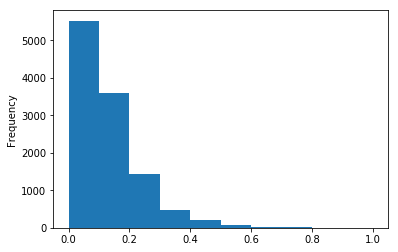

In [96]:
toxic_nyt_coms["neg"].plot.hist()

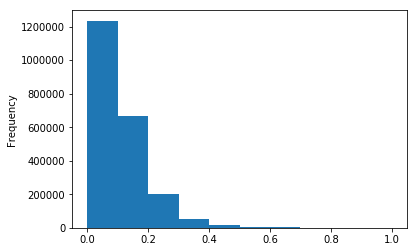

In [97]:
nyt_comments["neg"].plot.hist()

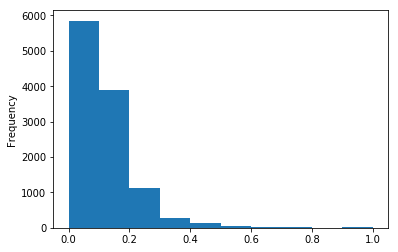

In [98]:
toxic_nyt_coms["pos"].plot.hist()

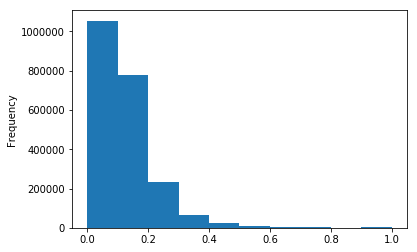

In [99]:
nyt_comments["pos"].plot.hist()

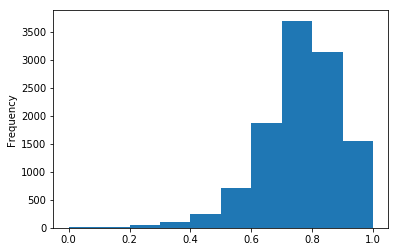

In [100]:
toxic_nyt_coms["neu"].plot.hist()

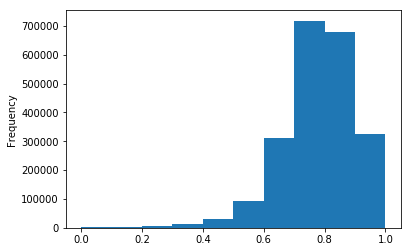

In [101]:
nyt_comments["neu"].plot.hist()

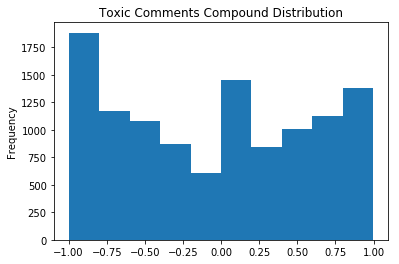

In [102]:
toxic_nyt_coms["compound"].plot.hist(title = "Toxic Comments Compound Distribution")

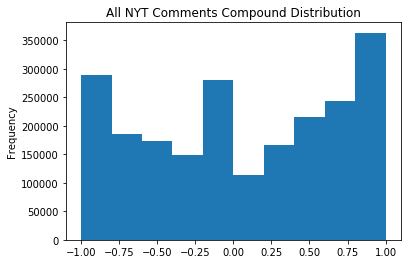

In [103]:
nyt_comments["compound"].plot.hist(title = "All NYT Comments Compound Distribution")